In [1]:
# -*- coding: utf-8 -*-
import dataiku
import pandas as pd, numpy as np
from dataiku import pandasutils as pdu

# Read recipe inputs
sentiment_analysis_filtered_prepared = dataiku.Dataset("sentiment_analysis_filtered_prepared")
sentiment_analysis_filtered_prepared_df = sentiment_analysis_filtered_prepared.get_dataframe()


# Compute recipe outputs from inputs
# TODO: Replace this part by your actual code that computes the output, as a Pandas dataframe
# NB: DSS also supports other kinds of APIs for reading and writing data. Please see doc.

positive_topics_df = sentiment_analysis_filtered_prepared_df # For this sample code, simply copy input to output


# Write recipe outputs
positive_topics = dataiku.Dataset("positive_topics")
positive_topics.write_with_schema(positive_topics_df)

53963 rows successfully written (w4FgB5es9L)


In [6]:
positive_topics_df.head(1)
raw_text = positive_topics_df['normalized-stop-words']
raw_text

0        ["best","thai","food","area","everything","aut...
1        ["unique","spot","graffiti","style","art","wal...
2        ["hospital","far","best","families","east","co...
3        ["love","gas","station","work","hotel","beach"...
4        ["want","stunning","unique","pieces","jewelry"...
5        ["give","place","6","stars","looks","deceive",...
6        ["place","fantastic","donuts","very","well","p...
7        ["happy","family","friendly","place","watch","...
8        ["high","beauty","amazing","high","desert","oa...
9        ["great","tour","very","informative","tour","g...
10       ["despite","spin","burgers","rouge","actually"...
11       ["great","service","husband","ordered","cheese...
12       ["mission","trying","find","perfect","coat","h...
13       ["wonderful","experience","food","right","frie...
14       ["great","meal","spiro","tonight","dining","co...
15       ["interior","design","impeccable","staff","fri...
16       ["great","food","service","super","nice","geor.

In [9]:
from dataiku import pandasutils as pdu
import pandas as pd,  seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text 

from sklearn.decomposition import LatentDirichletAllocation,NMF
#import pyLDAvis.sklearn
#pyLDAvis.enable_notebook()
n_topics= 10
topics_model = LatentDirichletAllocation(n_topics, random_state=0)

In [10]:
dataset_limit = 10000

In [13]:
custom_stop_words = []
#custom_stop_words = [u'did', u'good', u'right', u'said', u'does', u'way',u'edu', u'com', u'mail', u'thanks', u'post', u'address', u'university', u'email', u'soon', u'article',u'people', u'god', u'don', u'think', u'just', u'like', u'know', u'time', u'believe', u'say',u'don', u'just', u'think', u'probably', u'use', u'like', u'look', u'stuff', u'really', u'make', u'isn']

stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop_words)
cnt_vectorizer = CountVectorizer(strip_accents = 'unicode',stop_words = stop_words,lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b', max_df = 0.85, min_df = 2)

text_cnt = cnt_vectorizer.fit_transform(raw_text)

print(text_cnt.shape)

(53963, 26156)


In [14]:
tfidf_vectorizer = TfidfVectorizer(strip_accents = 'unicode',stop_words = stop_words,lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b', max_df = 0.75, min_df = 0.02)

text_tfidf = tfidf_vectorizer.fit_transform(raw_text)

print(text_tfidf.shape)

(53963, 303)


In [15]:
topics_model.fit(text_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [16]:
n_top_words = 10
feature_names = tfidf_vectorizer.get_feature_names()

def get_top_words_topic(topic_idx):
    topic = topics_model.components_[topic_idx]
   
    print( [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]] )
    
for topic_idx, topic in enumerate(topics_model.components_):
    print ("Topic #%d:" % topic_idx )
    get_top_words_topic(topic_idx)
    print ("")

Topic #0:
['food', 'great', 'service', 'dinner', 'server', 'restaurant', 'delicious', 'meal', 'experience', 'amazing']

Topic #1:
['store', 'place', 'love', 'like', 'time', 'great', 'years', 'really', 'people', 'need']

Topic #2:
['pizza', 'great', 'beer', 'bar', 'place', 'food', 'music', 'good', 'drinks', 'love']

Topic #3:
['best', 'food', 'new', 'orleans', 'tacos', 'place', 'favorite', 'amazing', 'great', 'restaurant']

Topic #4:
['great', 'time', 'job', 'work', 'recommend', 'professional', 'car', 'experience', 'thank', 'care']

Topic #5:
['chicken', 'good', 'food', 'delicious', 'sauce', 'place', 'sandwich', 'salad', 'fried', 'cheese']

Topic #6:
['great', 'food', 'service', 'place', 'friendly', 'love', 'recommend', 'staff', 'highly', 'sushi']

Topic #7:
['breakfast', 'food', 'brunch', 'place', 'wait', 'great', 'delicious', 'good', 'amazing', 'best']

Topic #8:
['coffee', 'great', 'place', 'free', 'love', 'shop', 'parking', 'staff', 'friendly', 'options']

Topic #9:
['cream', 'ice',

In [35]:
n_topics=['service', 'server','music', 'food','care','delicious','friendly','parking','options','dessert']
#dict_topic_name = {0: 'service', 1: 'server', 2: 'music', 3: 'food', 4: 'care', 5: 'delicious', 6: 'friendly', 7: 'parking', 8: 'options', 9: 'dessert'}
dict_topic_name = {i: "topic_"+str(i) for i in range(len(n_topics))}

Populating the interactive namespace from numpy and matplotlib


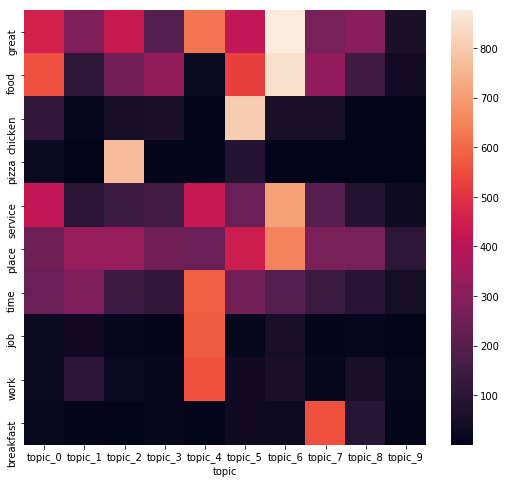

In [36]:
%pylab inline
word_model = pd.DataFrame(topics_model.components_.T)
word_model.index = feature_names
word_model.columns.name = 'topic'
word_model['norm'] = (word_model).apply(lambda x: x.abs().max(),axis=1)
word_model = word_model.sort_values(by='norm',ascending=0) # sort the matrix by the norm of row vector
word_model.rename(columns = dict_topic_name, inplace = True) #naming topic
 
del word_model['norm']

plt.figure(figsize=(9,8))
sns.heatmap(word_model[:10]) 

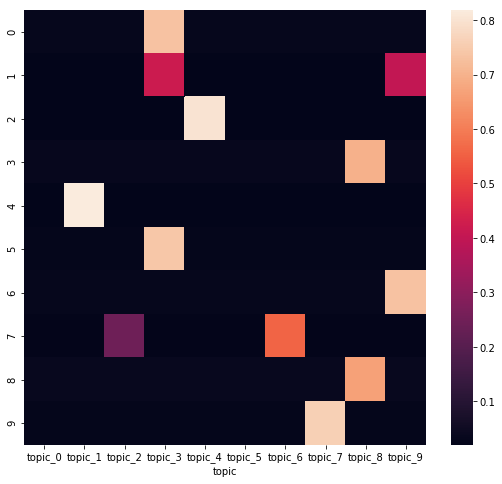

In [37]:
# retrieve the document-topic matrix
document_model = pd.DataFrame(topics_model.transform(text_tfidf))
document_model.columns.name = 'topic'
document_model.rename(columns = dict_topic_name, inplace = True) #naming topics

plt.figure(figsize=(9,8))
sns.heatmap(document_model.sort_index()[:10]) #we limit here to the first 10 texts

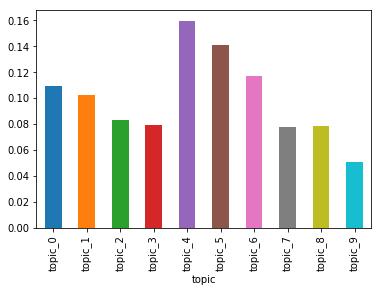

In [38]:
topics_proportion = document_model.sum()/document_model.sum().sum()
topics_proportion.plot(kind = "bar")

In [43]:
def top_documents_topics(topic_name, n_doc = 3, excerpt = True):
    '''This returns the n_doc documents most representative of topic_name'''
    
    document_index = list(document_model[topic_name].sort_values(ascending = False).index)[:n_doc]
    for order, i in enumerate(document_index):
        print("Text for the {}-th most representative document for topic {}:\n".format(order + 1,topic_name))
        if excerpt:
            print(raw_text[i][:1000])
        else:
            print(raw_text[i])
        print("\n******\n")

In [44]:
top_documents_topics("topic_0")

Text for the 1-th most representative document for topic topic_0:

["definitely","new","star","scene","arrival","promptly","cocktail","bar","generous","pour","way","bar","foyer","like","reception","area","warm","inviting","natalie","boo","3d","art","hangs","wall","provides","real","new","orleans","feel","newly","renovated","shotgun","space","party","six","arrived","seated","main","dining","room","small","uncrowded","room","decor","conventionally","new","orleans","window","allowing","guests","glimpse","kitchen","nice","touch","drives","home","recurring","theme","chef","owner","personally","cooking","learned","chef","cut","teeth","commander","palace","le","foret","restaurants","graduating","prestigious","culinary","institute","america","new","york","sous","chef","pastry","chef","similarly","impressive","resume","worked","commander","palace","couchon","graduating","culinary","school","meal","remarkable","party","six","able","taste","variety","apps","entrees","deserts","course","equally","

In [2]:
!pip install pyLDAvis

OSError: out of pty devices

In [1]:
pyLDAvis.sklearn.prepare(topics_model, text_tfidf, tfidf_vectorizer)

NameError: name 'pyLDAvis' is not defined

In [46]:
#pyLDAvis.sklearn.prepare(topics_model, text_tfidf, tfidf_vectorizer)

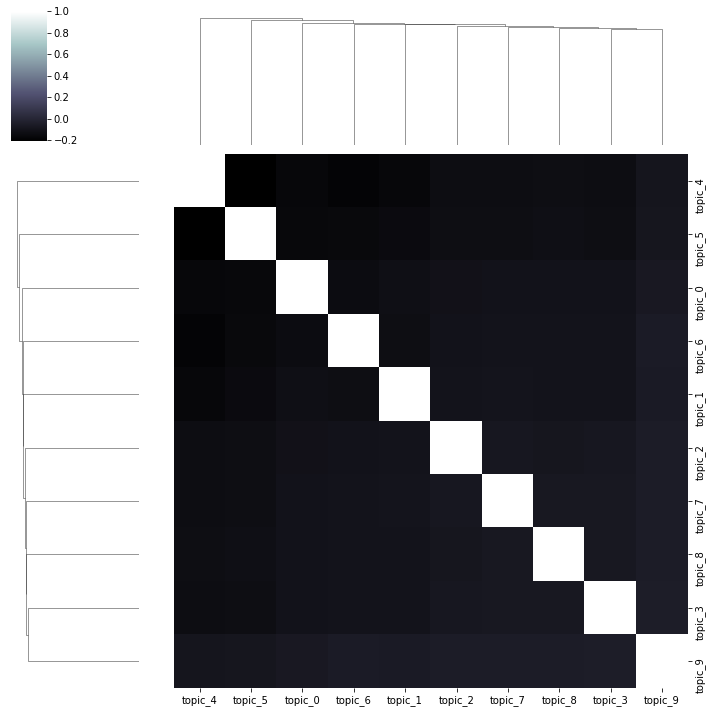

In [49]:
# correlation matrix between topics
cor_matrix = np.corrcoef(document_model.iloc[:,:len(n_topics)].values,rowvar=0)

#Renaming of the index and columns
cor_matrix = pd.DataFrame(cor_matrix)
cor_matrix.rename(index = dict_topic_name, inplace = True)
cor_matrix.rename(columns= dict_topic_name, inplace = True)

sns.clustermap(cor_matrix, cmap="bone")

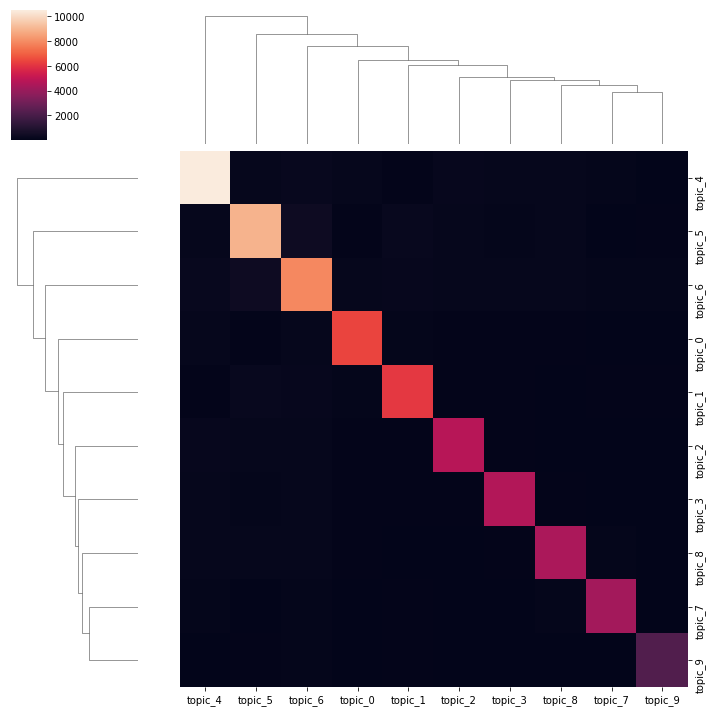

In [50]:
# contingency table on the binarized document-topic matrix
document_bin_topic = (document_model.iloc[:,:len(n_topics)] > 0.25).astype(int)
contingency_matrix = np.dot(document_bin_topic.T.values, document_bin_topic.values )

#Renaming of the index and columns
contingency_matrix = pd.DataFrame(contingency_matrix)
contingency_matrix.rename(index = dict_topic_name, inplace = True)
contingency_matrix.rename(columns= dict_topic_name, inplace = True)

sns.clustermap(contingency_matrix)